<a href="https://colab.research.google.com/github/Ashley-Morais-Perez/sparcs_descriptive_2022/blob/main/sparcs_descriptive_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd

In [48]:
df = pd.read_csv('https://health.data.ny.gov/resource/5dtw-tffi.csv')

In [49]:
# Change table from the orginial format to the max display in order to include 'total costs' for stats
pd.set_option('display.max_columns', None)

In [50]:
df

,hospital_service_area,hospital_county,operating_certificate_number,permanent_facility_id,facility_name,age_group,zip_code_3_digits,gender,race,ethnicity,length_of_stay,type_of_admission,patient_disposition,discharge_year,ccsr_diagnosis_code,ccsr_diagnosis_description,ccsr_procedure_code,ccsr_procedure_description,apr_drg_code,apr_drg_description,apr_mdc_code,apr_mdc_description,apr_severity_of_illness_code,apr_severity_of_illness,apr_risk_of_mortality,apr_medical_surgical,payment_typology_1,payment_typology_2,payment_typology_3,birth_weight,emergency_department_indicator,total_charges,total_costs
0,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,50 to 69,107,F,White,Not Span/Hispanic,3,Emergency,Home or Self Care,2022,INF012,COVID-19,ADM019,POTENTIAL COVID-19 THERAPIES,137,MAJOR RESPIRATORY INFECTIONS AND INFLAMMATIONS,4,DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,3,Major,Major,Medical,Medicaid,NaN,NaN,NaN,Y,"51,514.62","7,552.54"
1,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,18 to 29,104,M,Black/African American,Spanish/Hispanic,1,Emergency,Home or Self Care,2022,SKN001,Skin and subcutaneous tissue infections,ADM015,ADMINISTRATION OF ANTIBIOTICS,383,CELLULITIS AND OTHER SKIN INFECTIONS,9,"DISEASES AND DISORDERS OF THE SKIN, SUBCUTANEO...",2,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,Y,"25,370.86","3,469.55"
2,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,18 to 29,104,F,Other Race,Spanish/Hispanic,2,Urgent,Home or Self Care,2022,PRG016,Previous C-section,PGN002,SPONTANEOUS VAGINAL DELIVERY,560,VAGINAL DELIVERY,14,"PREGNANCY, CHILDBIRTH AND THE PUERPERIUM",1,Minor,Minor,Medical,Medicaid,NaN,NaN,NaN,N,"23,876.78","6,180.33"
3,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,18 to 29,100,F,Black/African American,Not Span/Hispanic,2,Elective,Home or Self Care,2022,PRG022,Prolonged pregnancy,PGN002,SPONTANEOUS VAGINAL DELIVERY,560,VAGINAL DELIVERY,14,"PREGNANCY, CHILDBIRTH AND THE PUERPERIUM",2,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,Y,"43,319.05","12,588.93"
4,New York City,Bronx,7000006.0,1168.0,Montefiore Medical Center-Wakefield Hospital,18 to 29,104,M,Other Race,Spanish/Hispanic,4,Emergency,Short-term Hospital,2022,MBD001,Schizophrenia spectrum and other psychotic dis...,MHT001,PHARMACOTHERAPY FOR MENTAL HEALTH (EXCLUDING S...,750,SCHIZOPHRENIA,19,MENTAL DISEASES AND DISORDERS,2,Moderate,Moderate,Medical,Medicaid,NaN,NaN,NaN,Y,"40,266.23","10,355.99"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,New York City,Manhattan,7002054.0,1464.0,New York-Presbyterian Hospital - Columbia Pres...,30 to 49,104,M,Black/African American,Spanish/Hispanic,1,Emergency,Home or Self Care,2022,GEN006,Other specified and unspecified diseases of ki...,IMG006,COMPUTERIZED TOMOGRAPHY (CT) WITH CONTRAST,465,URINARY STONES AND ACQUIRED UPPER URINARY TRAC...,11,DISEASES AND DISORDERS OF THE KIDNEY AND URINA...,3,Major,Major,Medical,Medicaid,NaN,NaN,NaN,Y,"19,571.62","4,338.02"
996,New York City,Kings,7001009.0,1294.0,Coney Island Hospital,50 to 69,112,F,White,Unknown,5,Emergency,Short-term Hospital,2022,CIR020,Cerebral infarction,ADM005,ADMINISTRATION OF THROMBOLYTICS AND PLATELET I...,45,CVA AND PRECEREBRAL OCCLUSION WITH INFARCTION,1,DISEASES AND DISORDERS OF THE NERVOUS SYSTEM,4,Extreme,Extreme,Medical,Medicare,Medicaid,NaN,NaN,Y,"66,131.84","30,220.86"
997,New York City,Manhattan,7002054.0,1464.0,New York-Presbyterian Hospital - Columbia Pres...,70 or Older,NaN,F,White,Spanish/Hispanic,3,Emergency,Home or Self Care,2022,CIR020,Cerebral infarction,CAR006,CAROTID ENDARTERECTOMY AND STENTING,24,OPEN EXTRACRANIAL VASCULAR PROCEDURES,1,DISEASES AND DISORDERS OF THE NERVOUS SYSTEM,2,Moderate,Moderate,Surgical,Medicare,Medicaid,NaN,NaN,Y,"131,746.47","44,532.01"
998,New York City,Kings,7001009.0,

In [90]:
## Section 3: Basic Descriptive Stats

In [51]:
#Stats for Length of Stay

# Convert 'Length_of_stay' column from string format to numeric
df['length_of_stay'] = pd.to_numeric(df['length_of_stay'], errors='coerce')


In [136]:
# Descriptive statistics
df['length_of_stay'].describe()


,length_of_stay
count,998.000000
mean,5.970942
std,8.314659
min,1.000000
25%,2.000000
50%,3.000000
75%,7.000000
max,99.000000


In [135]:
# Stats for Total Charges
## It seems that the descriptive stats do not match what is on the CSV file
df['total_charges'].describe()

,total_charges
count,1000.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [141]:
# After trying to remove NaN or 0, it still shows NaN and 0

# Drop NaN and filter out rows with 0
filtered_df = df[df['total_charges'].notna() & (df['total_charges'] != 0)]

# Descriptive statistics
print(filtered_df['total_charges'].describe())


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: total_charges, dtype: float64


In [54]:
# Stats for Total Costs
df['total_costs'] = pd.to_numeric(df['total_costs'], errors='coerce')

In [137]:
df['total_costs'].describe()

,total_costs
count,19.000000
mean,742.211053
std,153.261943
min,525.490000
25%,563.670000
50%,830.060000
75%,849.145000
max,917.460000


In [89]:
## Section 4: Exploring Categorical Variables

In [61]:
# Import other pacakges for graphs
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

age_group
50 to 69       257
70 or Older    235
30 to 49       223
0 to 17        147
18 to 29       138
Name: count, dtype: int64


Text(0.5, 1.0, 'Age Group Distribution of NYS Hopsital Patients')

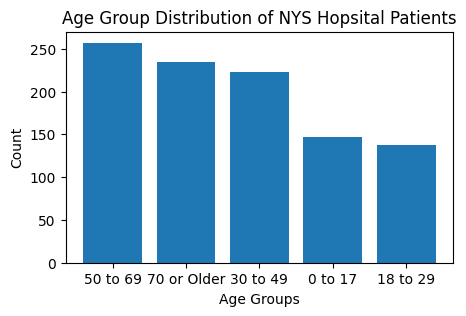

In [98]:
# Distribution for Age Group

value_counts = df['age_group'].value_counts()
print(value_counts)

# Bar Graph for Distribution

plt.figure(figsize=(5, 3))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.title('Age Group Distribution of NYS Hopsital Patients')



gender
F    578
M    422
Name: count, dtype: int64


Text(0.5, 1.0, 'Gender Distribution of NYS Hospital Patients')

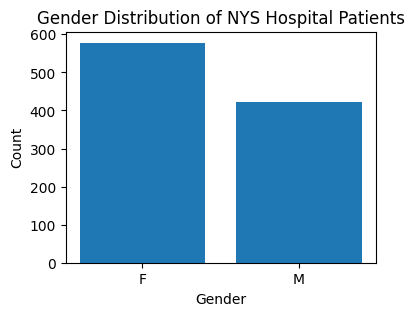

In [93]:
# Distribution for Gender
value_counts = df['gender'].value_counts()
print(value_counts)

# Bar Graph for Distribution
plt.figure(figsize=(4, 3))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution of NYS Hospital Patients')

type_of_admission
Emergency    746
Elective     157
Newborn       51
Urgent        46
Name: count, dtype: int64


Text(0.5, 1.0, 'Types of Admissions of NYS Hospital Patients')

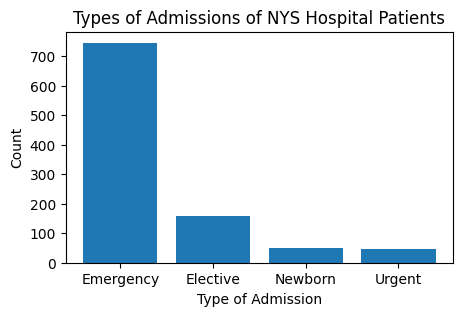

In [104]:
# Distribution of Type of Admission

value_counts = df['type_of_admission'].value_counts()
print(value_counts)

# Bar Graph for Distribution
plt.figure(figsize=(5, 3))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Type of Admission')
plt.ylabel('Count')
plt.title('Types of Admissions of NYS Hospital Patients')

In [167]:
# Relation between Age Group, Gender, and Type of Admission

distribution = df.groupby(['age_group', 'gender', 'type_of_admission']).size()
print(distribution)


age_group    gender  type_of_admission
0 to 17      F       Elective               2
                     Emergency             35
                     Newborn               19
                     Urgent                 1
             M       Elective               4
                     Emergency             54
                     Newborn               32
18 to 29     F       Elective              42
                     Emergency             63
                     Urgent                 4
             M       Elective               2
                     Emergency             24
                     Urgent                 3
30 to 49     F       Elective              63
                     Emergency             92
                     Urgent                 3
             M       Elective               9
                     Emergency             53
                     Urgent                 3
50 to 69     F       Elective              12
                     Emergency           

In [172]:
# Distribution to see the cost between each age group, though only newborn data was displayed

distribution = df.groupby(['age_group', 'type_of_admission', 'total_costs']).size()
print(distribution)

age_group  type_of_admission  total_costs
0 to 17    Newborn            525.49         1
                              539.76         1
                              548.32         2
                              563.67         3
                              798.67         1
                              821.50         1
                              830.06         2
                              838.62         1
                              845.40         2
                              852.89         1
                              875.08         1
                              895.06         1
                              898.91         1
                              917.46         1
dtype: int64


In [105]:
## Section 5: Visualizations

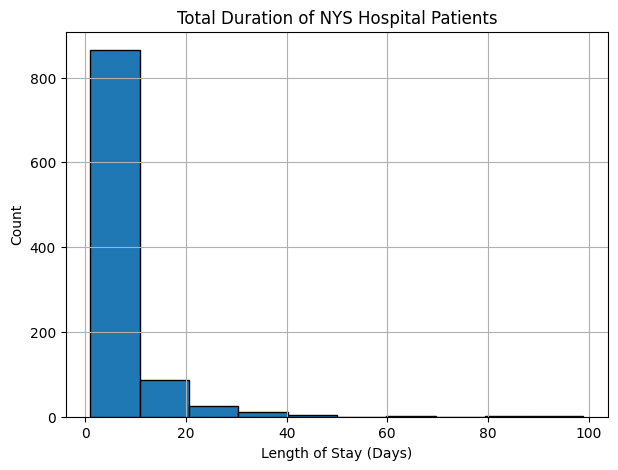

In [115]:
 # Histogram for Length of Stay

 df['length_of_stay'].hist(figsize=(7,5), edgecolor='black')
 plt.xlabel('Length of Stay (Days)')
 plt.ylabel('Count')
 plt.title('Total Duration of NYS Hospital Patients')
plt.show()


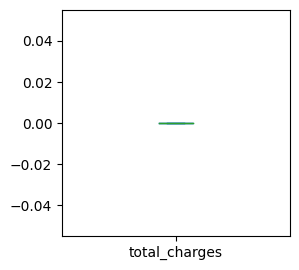

In [140]:
# Boxplot for Total Charges
## The descriptive stats do not reflect what is actually on the data table, which is why the graph is wrong

df['total_charges'].plot(kind='box', subplots=True, sharex=False, figsize=(10,10), layout=(3,3))
plt.show()


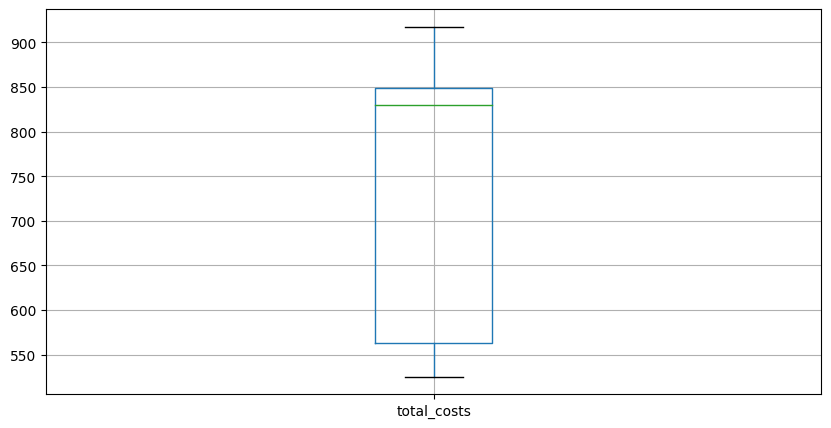

In [165]:
# Boxplot for Total Cost to see some data


# Create the box plot
df.boxplot(column=['total_costs'], figsize=(10,5))
plt.show()





Text(0.5, 1.0, 'Types of Admissions of NYS Hospital Patients')

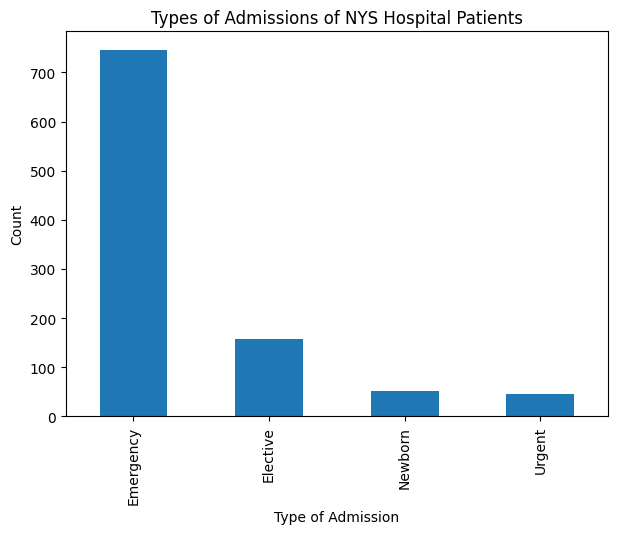

In [148]:
# Bar Plot for Type of Admission

plt.figure(figsize=(7, 5))
df['type_of_admission'].value_counts().plot(kind='bar')
plt.xlabel('Type of Admission')
plt.ylabel('Count')
plt.title('Types of Admissions of NYS Hospital Patients')